In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rnaC = pd.read_csv("msresist/data/MS/CPTAC/Omics results/mRNA_Cluster_Correlations.csv").drop("Unnamed: 0", axis=1)
protC = pd.read_csv("msresist/data/MS/CPTAC/Omics results/prot_Cluster_Correlations.csv").drop("Unnamed: 0", axis=1)

#Change column labels to Symbol genes
rnaC.columns = rnaC.iloc[-1, :]
rnaC = rnaC.iloc[:-1, :]
protC.columns = protC.iloc[-1, :]
protC = protC.iloc[:-1, :]

In [3]:
def heatmap_ClusterVsTargets_Corr(targets, omic="Protein", title=False):
    """Plot correlations between clusters and targets"""
    tar = pd.DataFrame()
    for t in targets:
        try:
            if omic == "Protein":
                tar[t] = protC[t]
            elif omic == "RNA":
                tar[t] = rnaC[t]
        except:
            print(t + " not present in the data set")
            continue
    tar = tar.astype(float)
    tar.index += 1
    g = sns.clustermap(tar.astype(float), figsize=(9, 7))
    if title:
        g.fig.suptitle(title)

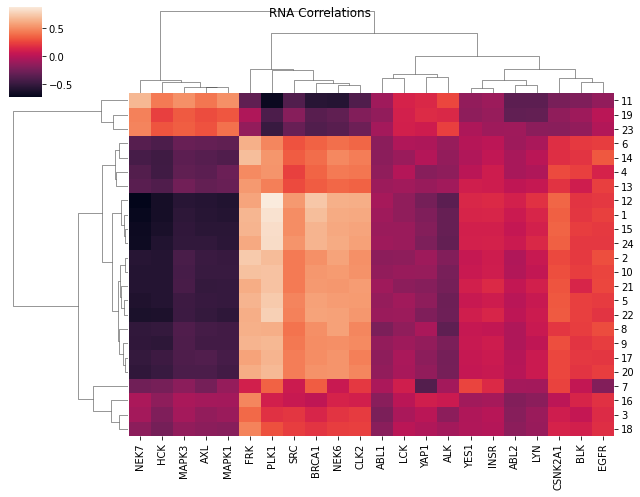

In [4]:
targets = ["AXL", "ABL1", "ABL2", "SRC", "LCK", "LYN", "FRK", "YES1", "HCK", "YAP1", "BLK", "NEK6", "NEK7", "PLK1", "CLK2", "CSNK2A1", "MAPK3", "MAPK1", "BRCA1", "EGFR", "ALK", "INSR"]

heatmap_ClusterVsTargets_Corr(targets, omic="RNA", title="RNA Correlations")

ABL1 not present in the data set
CSNK2A1 not present in the data set
ALK not present in the data set


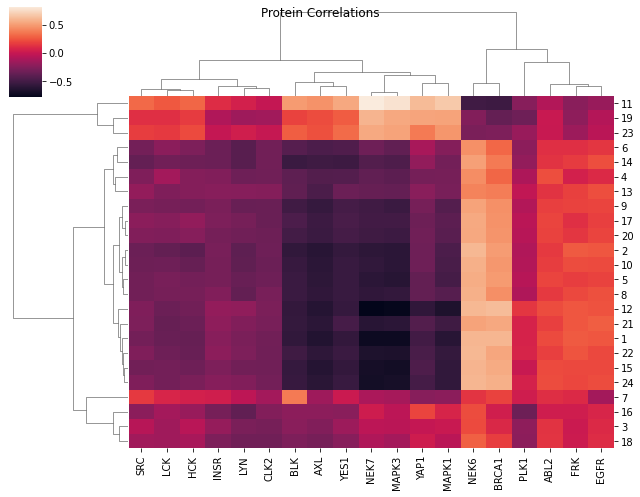

In [5]:
heatmap_ClusterVsTargets_Corr(targets, omic="Protein", title="Protein Correlations")

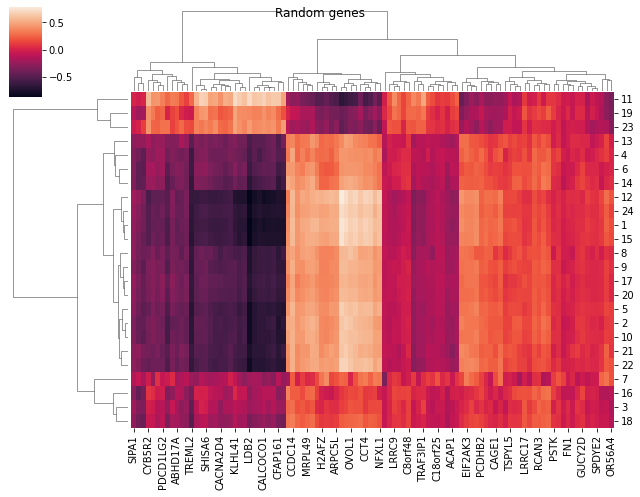

In [6]:
import random

ii = random.sample(range(rnaC.shape[1]), 100)
targets = list(rnaC.columns[ii])
heatmap_ClusterVsTargets_Corr(targets, omic="RNA", title="Random genes")